# Sampling with WNBA 2017 Kaggle Dataset

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
wnba = pd.read_csv('wnba.csv')

In [10]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [11]:
wnba.tail()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,...,11,13,24,30,18,1,32,151,0,0


In [5]:
wnba.shape

(143, 32)

In [6]:
parameter = wnba['Games Played'].max()

In [7]:
sample = wnba['Games Played'].sample(n=30,
                                    random_state=1)
statistic = sample.max()
sampling_error = parameter - statistic

In [8]:
sampling_error

2

## Plotting Sample Means vs Population Mean

In order to get an idea for the randomness of sample means, I will take 100 samples and plot them vs the population mean.

In [12]:
pts_means = []

for i in range(100):
    sample = wnba['PTS'].sample(10, random_state=i)
    pts_mean = sample.mean()
    pts_means.append(pts_mean)



In [14]:
parameter = wnba['PTS'].mean()

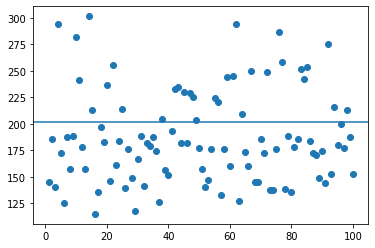

In [15]:
plt.scatter(x=range(1,101),
           y=pts_means)
plt.axhline(y=parameter)

## Looking into Points Per Game

PPG = $\frac{\text{Points}}{\text{Games}}$

In [16]:
wnba['Points Per Game'] = wnba['PTS'] / wnba['Games Played']

In [17]:
positions = wnba['Pos'].unique()

In [18]:
positions

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

In [19]:
points_per_position = {}

for position in positions:
    sample = wnba[wnba['Pos'] == position].sample(10, 
                                                  random_state=0)
    points_per_position[position] = sample['Points Per Game'].mean()


In [22]:
vals = list(points_per_position.values())
keys = list(points_per_position.keys())

In [23]:
position_most_points = keys[vals.index(max(vals))]

In [24]:
position_most_points

'C'

I've looked through, and sampled, to determine that the position with the most poits per game on average is the Center.